# Data Wrangling Challenge
### Pull and manipulate the API data

The point of this exercise is to try data enrichment with data from external APIs. We are going to take data about car crashes in Monroe County, Indiana from 2003 to 2015 and try to figure out the weather during the accident and how many bars there are in the area. We will work with two different APIs during this challenge:

- Foursquare API
- World Weather Online API

We will try to find correlations between the severity of crash and weather/number of bars in the area. To indicate the severity of a crash, we will use column `Injury Type`.

## Data

The data for this exercise can be found [here](https://drive.google.com/file/d/1_KF9oIJV8cB8i3ngA4JPOLWIE_ETE6CJ/view?usp=sharing).

Just run the cells below to get your data ready. Little help from us.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("monroe-county.csv", encoding="unicode_escape")
# ========================
# preparing data
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)
# creation of variable with lon and lat together
data['ll'] = data['Latitude'].astype(str) + ',' + data['Longitude'].astype(str)
data = data[data['ll'] != '0.0,0.0']
print(data.shape)
data.head()

(49005, 13)


,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,ll
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,"39.15920668,-86.52587356"
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,"39.16144,-86.534848"
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,"39.14978027,-86.56889006"
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,"39.165655,-86.57595635"
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,"39.164848,-86.57962482"


In [109]:
type(data['ll'])

pandas.core.series.Series

# Foursquare API

Foursquare API documentation is [here](https://developer.foursquare.com/)

1. Start a foursquare application and get your keys.
2. For each crash, create the function **get_venues** that will pull bars in the radius of 5km around the crash

#### example
`get_venues('48.146394, 17.107969')`

3. Find a relationship (if there is any) between number of bars in the area and severity of the crash.

HINTs: 
- check out python package "foursquare" (no need to send HTTP requests directly with library `requests`)
- **categoryId** for bars and nightlife needs to be found in the [foursquare API documentation](https://developer.foursquare.com/docs/api-reference/venues/search/)

In [4]:
#import libraries
import requests as re    # To get HTTP request
import foursquare
from IPython.display import JSON # To nicely print out JSON and make it more readable (can only use in Jupyter Lab)

In [6]:
from api_keys import FS_client
from api_keys import FS_secret
from api_keys import FS_Key

In [27]:
#Use access token
client = foursquare.Foursquare(access_token=FS_Key)

In [7]:
#define api url elements
root_endpoint = "https://api.foursquare.com/v3/places/search"

headers = {
    "Accept": "application/json",
    "Authorization": FS_Key
}

#Test out retrieving API info
response = re.get(root_endpoint,
                  params={'ll': '39.77500526484702,-86.14968724867599', 'categories': 13003,
                          'radius': 5000, 'limit': 50}, headers = headers)

#make sure it works
print(response.status_code)

#convert into json (nested list of dictionaries)
result = response.json()
result['results']

#Nicely display returned JSON. This has to be the last line of code in a block
JSON(result)

200


<IPython.core.display.JSON object>

In [3]:
#find location (lat and long)
location =data.head(1000)['ll'].tolist()

In [23]:
#try pulling lat and long from bars
response = re.get(root_endpoint, 
                      params={'ll': location[1], 'categories': 13003, 'radius': 5000, 'limit': 50}, 
                      headers = headers)
result = response.json()

no_bars =[]
bars = 0
    
for place in result['results']:
            #go into every type a place is
    for p_type in place['categories']:
            
                #if it's a bar add one to the count
        if p_type['name'] == 'Bar':
            bars += 1
no_bars.append(bars)
print(no_bars)

[20]


In [10]:
 #function get_venues that will pull bars in the radius of 5km around the crash
def get_venues(location):
    """ intakes string of lat, long location, returns int representing how many bars
    are within 5km of the crash
    """
    no_bars=[]
    for item in location:
        response = re.get(root_endpoint, 
                      params={'ll': item, 'categories': 13003, 'radius': 5000, 'limit': 50}, 
                      headers = headers)
        result = response.json()

        bars = 0
    
        for place in result['results']:
            #go into every type a place is
            for p_type in place['categories']:
            
                #if it's a bar add one to the count
                if p_type['name'] == 'Bar':
                    bars += 1
        no_bars.append(bars)
    return no_bars

In [12]:
#test values
number_bars = get_venues(location)

In [26]:
selected = data.head(1000)

In [27]:
#add number of bars to data frame
selected['n_bars'] = number_bars

<ipython-input-27-027b74ced779>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['n_bars'] = number_bars


In [29]:
selected.head(5)

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,ll,n_bars
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,"39.15920668,-86.52587356",20
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,"39.16144,-86.534848",20
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,"39.14978027,-86.56889006",20
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,"39.165655,-86.57595635",20
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,"39.164848,-86.57962482",20


In [30]:
#check columns and replace values
selected["Injury Type"].unique()
selected["severity"] = 0
selected.loc[selected["Injury Type"] == 'Non-incapacitating',"severity"] = 1
selected.loc[selected["Injury Type"] == 'Incapacitating',"severity"] = 2
selected.loc[selected["Injury Type"] == 'Fatal',"severity"] = 3

<ipython-input-30-2c048bdbc2fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["severity"] = 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
#view dataframe
selected

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,ll,n_bars,severity
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,"39.15920668,-86.52587356",20,0
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,"39.16144,-86.534848",20,0
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,"39.14978027,-86.56889006",20,1
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,"39.165655,-86.57595635",20,1
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,"39.164848,-86.57962482",20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,902418005,2015,3,2,Weekday,1600.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,SR37S & TAPP,39.137040,-86.572896,"39.13704,-86.572896",20,0
1068,902418014,2015,3,2,Weekday,1800.0,2-Car,No injury/unknown,UNSAFE BACKING,W 17TH,39.178960,-86.534720,"39.17896,-86.53472",20,0
1069,902418058,2015,3,2,Weekday,2200.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,7TH & WALNUT,39.168640,-86.533568,"39.16864,-86.533568",20,0
1070,902418409,2015,3,3,Weekday,1100.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,W 3RD & WESTPLEX,39.164410,-86.553900,"39.16440971,-86.55389986",20,0


In [34]:
#find unique values for Injury type
selected['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

In [35]:
#create severity column equal to 0 and add values
selected["severity"] = 0
selected.loc[selected["Injury Type"] == 'No injury/unknown',"severity"] = 1
selected.loc[selected["Injury Type"] == 'Non-incapacitating',"severity"] = 2
selected.loc[selected["Injury Type"] == 'Incapacitating',"severity"] = 3
selected.loc[selected["Injury Type"] == 'Incapacitating',"severity"] = 4

<ipython-input-35-3210e56bcd15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["severity"] = 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
#Correlation between severity and number of bars
selected[['severity',"n_bars"]].corr()

,severity,n_bars
severity,1.000000,-0.027427
n_bars,-0.027427,1.000000


<AxesSubplot:xlabel='Injury Type'>

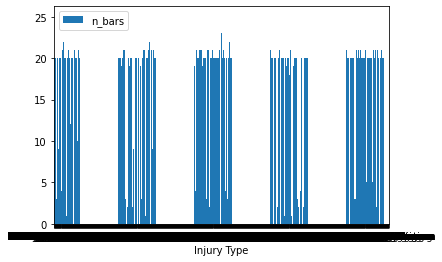

In [41]:
#plot injury type with number of bars
selected.plot.bar(x='Injury Type', y = 'n_bars', rot=0)

# World Weather Online API

World Weather Online API is [here](https://www.worldweatheronline.com/developer/api/historical-weather-api.aspx)

1. Sign up for FREE api key if you haven't done that before (it's free for **30 days**).
2. For each crush, get the weather for the location and date.
3. Find a relationship between the weather and severity of the crash.

Hints:

* pull weather only for smaller sample of crashes (250 or so) due to API limits
* for sending HTTP requests check out "requests" library [here](http://docs.python-requests.org/en/master/)


In [57]:
#import libraries
import requests as r
import json
import time
import datetime
import pandas as pd
from api_keys import WWorld
api_key = WWorld

In [76]:
#view data
weather_data = data[0:117]
weather_data.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,ll
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,"39.15920668,-86.52587356"
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,"39.16144,-86.534848"
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,"39.14978027,-86.56889006"
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,"39.165655,-86.57595635"
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,"39.164848,-86.57962482"


In [59]:
#create date column
weather_data['Date']= weather_data['Year'].astype(str)+'-'+weather_data['Month'].astype(str)+'-'+weather_data['Day'].astype(str)

<ipython-input-59-b2adc672bcdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['Date']= weather_data['Year'].astype(str)+'-'+weather_data['Month'].astype(str)+'-'+weather_data['Day'].astype(str)


In [46]:
#check column
weather_data.head(5)

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,ll,Date
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,"39.15920668,-86.52587356",2015-1-5
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,"39.16144,-86.534848",2015-1-6
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,"39.14978027,-86.56889006",2015-1-6
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,"39.165655,-86.57595635",2015-1-7
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,"39.164848,-86.57962482",2015-1-7


In [60]:
#create variable of diction containing long,lat and date
w_dic = dict(zip(weather_data.ll, weather_data.Date))

In [61]:
#test api

#define api url elements
root_endpoint = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"


#Test out retrieving API info
response = re.get(root_endpoint,
                  params={'q': '39.77500526484702,-86.14968724867599', 
                          'date': '2015-1-5', 'time': '0',
                          'key': WWorld, 'format': 'json'})

#make sure it works
print(response.status_code)

#convert into json (nested list of dictionaries)
result = response.json()

#Nicely display returned JSON. This has to be the last line of code in a block
JSON(result)

200


<IPython.core.display.JSON object>

In [62]:
#check with average temp is
result['data']['weather'][0]['avgtempC']

'-11'

In [64]:
#try testing pulling the specific data with coordinates and data

weather = []


response = re.get(root_endpoint,
                  params={'q': '39.77500526484702,-86.14968724867599', 
                          'date': '2015-01-05',
                          'key': WWorld, 'format': 'json'})
result = response.json()
    
avg_temp = result['data']['weather'][0]['avgtempC']
weather.append(avg_temp)
print(weather)

['-11']


In [68]:
#run dictionary into for loop to get temperatures

weather = []

for key, value in w_dic.items():
    response = re.get(root_endpoint,
                  params={'q': key, 
                          'date': value,
                          'key': WWorld, 'format': 'json'})
    result = response.json()
    
    avg_temp = result['data']['weather'][0]['avgtempC']
    weather.append(avg_temp)
print(weather)

['-9', '-7', '-7', '-15', '-15', '-7', '-7', '-7', '1', '-15', '-2', '1', '-15', '-15', '-2', '-2', '-2', '-2', '-2', '-7', '1', '-2', '1', '1', '1', '-2', '1', '-2', '1', '1', '-14', '8', '8', '8', '1', '-15', '8', '1', '1', '7', '1', '1', '8', '1', '1', '8', '1', '1', '-9', '-9', '-9', '-9', '-9', '-9', '-15', '1', '-9', '-10', '-7', '-2', '-9', '-7', '-7', '8', '-7', '-7', '1', '-15', '-7', '-2', '-15', '-15', '-7', '-15', '-2', '-2', '-2', '-2', '1', '-2', '1', '1', '1', '1', '1', '7', '8', '-2', '1', '8', '8', '8', '8', '8', '8', '1', '8', '1', '1', '1', '-9', '8', '-9', '-9', '-9', '-9', '-9', '-10', '-9', '1', '-9', '-7', '-9', '-9', '-9', '-7', '-7']


In [69]:
#create definition

def weather_function(w_dic):
    #get data relevant to input data
    weather = []

    for key, value in w_dic.items():
        response = re.get(root_endpoint,
                  params={'q': key, 
                          'date': value,
                          'key': WWorld, 'format': 'json'})
        result = response.json()
    
        avg_temp = result['data']['weather'][0]['avgtempC']
        weather.append(avg_temp)
    return weather

In [70]:
#create variable using function
local_w = weather_function(w_dic)

In [75]:
#check len
len(local_w)

117

In [89]:
#changed weather data to 117
weather_data['temp'] = local_w

<ipython-input-89-025dc17a55a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data['temp'] = local_w


In [90]:
#check data
weather_data

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,ll,avg_temp,severity,temp
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,"39.15920668,-86.52587356",-9,1,-9
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,"39.16144,-86.534848",-7,1,-7
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,"39.14978027,-86.56889006",-7,2,-7
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,"39.165655,-86.57595635",-15,2,-15
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,"39.164848,-86.57962482",-15,1,-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,902374528,2015,1,5,Weekday,900.0,1-Car,No injury/unknown,UNSAFE BACKING,2418 E GOLDIN & E GOLDIN,39.128067,-86.508726,"39.128067,-86.50872634",-9,1,-9
117,902374541,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,UNSAFE BACKING,NORTH FEE,39.176588,-86.518913,"39.17658828,-86.51891313",-9,1,-9
118,902374549,2015,1,5,Weekday,800.0,1-Car,No injury/unknown,UNSAFE LANE MOVEMENT,FOREST & KIRKWOOD,39.166089,-86.519626,"39.16608943,-86.51962569999999",-9,1,-9
119,902374663,2015,1,5,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,N WALNUT & SR46E,39.186368,-86.534400,"39.186368,-86.5344",-7,1,-7


In [80]:
#check unqiue values for injury types
weather_data['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating'],
      dtype=object)

In [81]:
#Add severity column and assign values
weather_data["severity"] = 0
weather_data.loc[weather_data["Injury Type"] == 'No injury/unknown',"severity"] = 1
weather_data.loc[weather_data["Injury Type"] == 'Non-incapacitating',"severity"] = 2
weather_data.loc[weather_data["Injury Type"] == 'Incapacitating',"severity"] = 3

<ipython-input-81-0eceec7b2f9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data["severity"] = 0
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [91]:
#correlation between severity and temp
weather_data[['severity','temp']].corr()

,severity
severity,1.0
